# Домашняя работа 8

### 1. Обучить любую модель классификации на датасете IRIS до применения самописного PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [3]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

In [4]:
# Для начала отмасштабируем выборку
X = X.astype(float)
X = standard_scale(X)

##### Модель до применения PCA

In [5]:
# Разбитие выборки на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [6]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

95.24

##### Применим РСА (из урока)

In [7]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X.T @ X

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(437.77467247979905, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(137.10457072021057, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.013531335697206, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(3.1072254642929558, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [8]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329987, 22.850761786701774, 3.6689218892828697, 0.517870910715493]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [9]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [10]:
# Сформируем новую матрицу "объекты-признаки"
Z = X.dot(W)

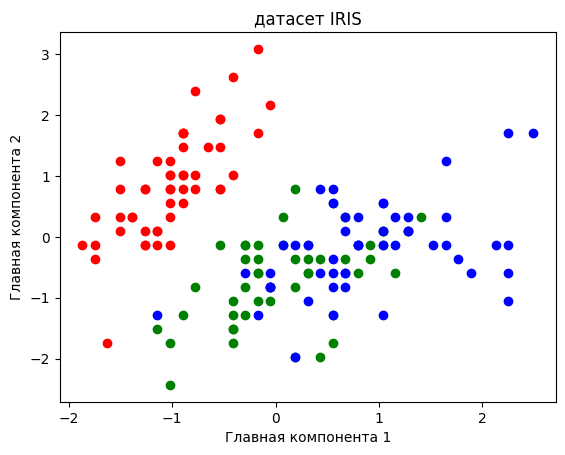

In [11]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('датасет IRIS')
plt.show()

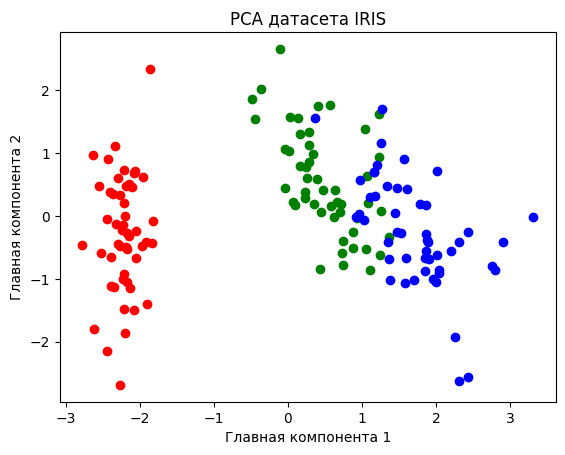

In [12]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

##### Модель после применения РСА

In [13]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=9)

In [14]:
logreg2 = LogisticRegression()
logreg2.fit(Z_train, y_train)
y_pred2 = logreg2.predict(Z_test)
acc_log2 = round(logreg2.score(Z_train, y_train) * 100, 2)
acc_log2

92.38

In [15]:
acc_log, acc_log2

(95.24, 92.38)

Видно, что с применением РСА, модель выдает метрику немного хуже (если поэксперементировать с параметрами в train, то может и сильно измениться)

##### 2. *Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [16]:
U, D, V = np.linalg.svd(X)
# сингулярные числа матрицы
D

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [17]:
eig_sum2 = sum(D)
var_exp2 = [(i / eig_sum2) * 100 for i in sorted(D, reverse=True)]
cum_var_exp2 = np.cumsum(var_exp2)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp2}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp2}')

Доля дисперсии, описываемая каждой из компонент 
[53.52971788236239, 29.956812784020087, 12.00368241720948, 4.509786916408034]
Кумулятивная доля дисперсии по компонентам 
[ 53.52971788  83.48653067  95.49021308 100.        ]


Возьмем первые 3 признака, потеряв около 5% информации

In [18]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W2 = V[:, :3]

print(f'Матрица весов W:\n', W2)

Матрица весов W:
 [[ 0.52106591 -0.26934744  0.5804131 ]
 [-0.37741762 -0.92329566 -0.02449161]
 [ 0.71956635 -0.24438178 -0.14212637]
 [ 0.26128628 -0.12350962 -0.80144925]]


Сформируем новую матрицу "объекты-признаки"

In [19]:
X = X @ W2
X

array([[-2.16199391, -0.20824916,  0.69701917],
       [-1.85386523,  0.91972173,  0.58455377],
       [-2.19479706,  0.57380492,  0.44070126],
       [-2.08925659,  0.79120079,  0.35985553],
       [-2.31201067, -0.38815258,  0.62105386],
       [-2.12862356, -1.2305024 ,  0.65022254],
       [-2.35640215,  0.15121396,  0.24552345],
       [-2.09735174,  0.02303674,  0.62425154],
       [-2.08266715,  1.29544269,  0.23855457],
       [-1.93424093,  0.70954986,  0.6763343 ],
       [-2.1054469 , -0.74512731,  0.88864755],
       [-2.18272634,  0.07441922,  0.47551861],
       [-1.95139536,  0.96861583,  0.61972287],
       [-2.3897725 ,  1.1734672 ,  0.29232007],
       [-2.23623695, -1.47162126,  1.17727785],
       [-2.45541239, -2.36332948,  0.84917155],
       [-2.29221676, -1.17494228,  0.68253493],
       [-2.12760023, -0.224507  ,  0.59152265],
       [-1.88672759, -1.09961365,  0.97233921],
       [-2.34734287, -0.87601606,  0.56653089],
       [-1.76300935, -0.13528835,  0.889